In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib



In [2]:
# imports

import cv2                         # opencv-python
import numpy as np                 # numpy
import matplotlib.pyplot as plt    # matplotlib

In [3]:
# check opencv-python installation
print(f"Version of OpenCV installed: {cv2.__version__}")


Version of OpenCV installed: 4.9.0


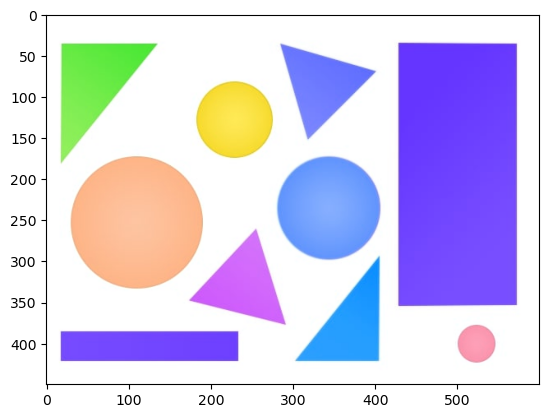

In [4]:
# load image from disk
img = cv2.imread("C:/KDU/Semester 5/IPCV/shapes.jpg")

# display the loaded image
plt.imshow(img)


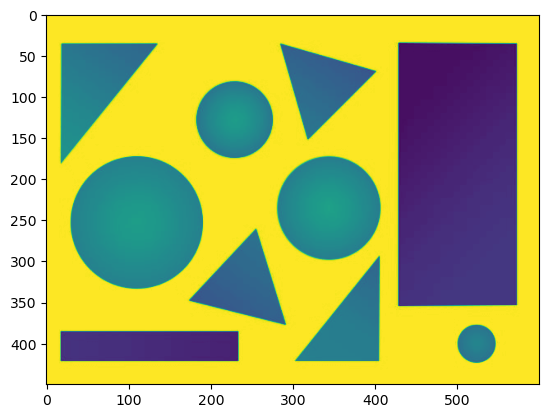

In [5]:
# convert the original image from the BGR (Blue, Green, Red) color space to grayscale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

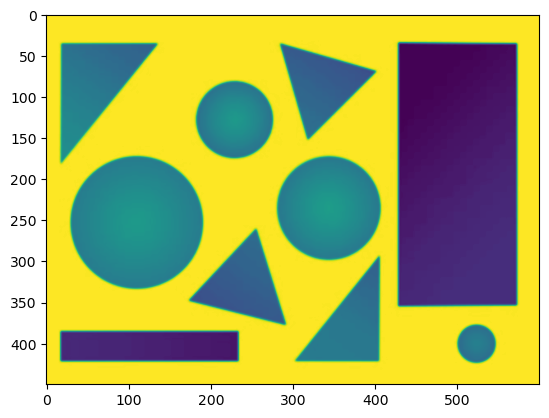

In [6]:
# apply a Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred)

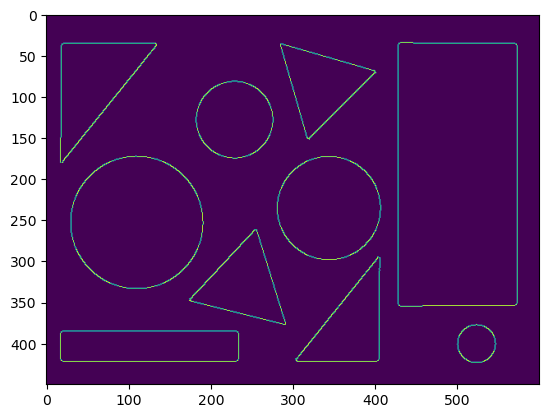

In [7]:
 #create the edge map for the image using Canny edge detection

edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges)

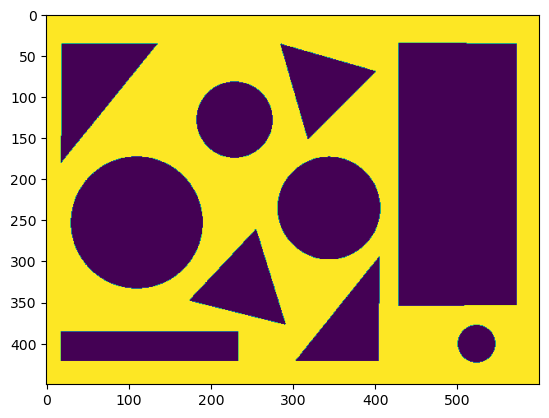

In [8]:
# threshold the grayscale image

_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

In [9]:

# find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

(array([[[  0,   0]],

       [[  0, 449]],

       [[599, 449]],

       [[599,   0]]], dtype=int32),)


In [10]:
# draw contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

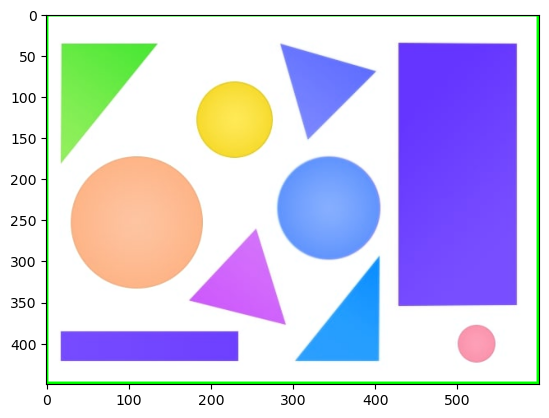

In [11]:

# draw the original image (after applying contours)
plt.imshow(img)

In [12]:
# function to find triangles in an image

def find_triangles(image_path):
    # load the image from the path
    img = cv2.imread(image_path)

    # convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # apply Gaussian blur to reduce noise and help contour detection
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)

    # use Canny edge detection to find edges in the image
    edges = cv2.Canny(blurred, 50, 150)

    # find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # iterate through the contours
    for contour in contours:
        # approximate the contour to a polygon
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # if the polygon has 3 vertices, it's a triangle
        if len(approx) == 3:
            # draw a bounding box around the triangle (in red)
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # convert BGR image to RGB for Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # plot the image with triangles
    plt.imshow(img_rgb)
    plt.title('Triangles with Bounding Boxes')
    plt.show()
    

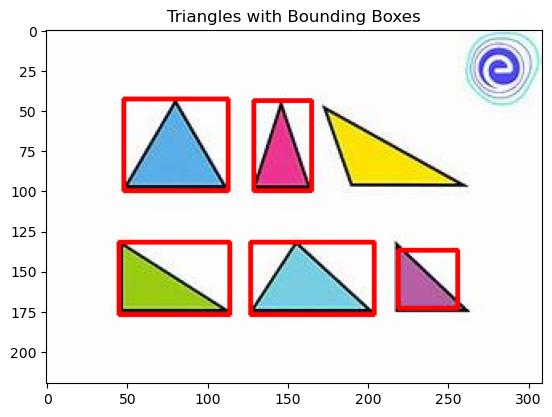

In [14]:

# call find_triangles() function with input image
find_triangles("C:/KDU/Semester 5/IPCV/shapes2.jpg")

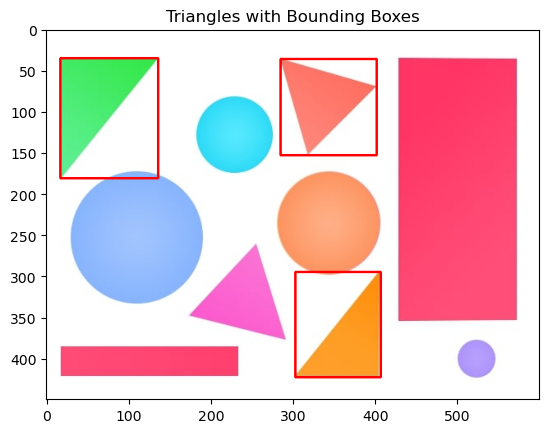

In [15]:
# call find_triangles() function with input image
find_triangles("C:/KDU/Semester 5/IPCV/shapes.jpg")